# Energy Based Model (EBM)

In [1]:
import jax
import haiku as hk
from utils import *
from model_ebm import *
import copy

## Shared Configuration

In [2]:
config_shared = {}
config_shared['epochs'] = 1000
config_shared['batch_size'] = 128
config_shared['learning_rate'] = 1e-3
config_shared['mlp_layer_dim'] = [64, 64, 1]
config_shared['sample_steps'] = 1000
prng_seq = hk.PRNGSequence(jax.random.PRNGKey(0))

2024-04-26 21:21:18.460284: W external/xla/xla/service/gpu/nvptx_compiler.cc:718] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.4.131). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


## Checkerboard Dataset

### Training

In [5]:
# Create customized config
config = copy.deepcopy(config_shared)

In [6]:
# Load dataset and train model
dataset_name = 'checkerboard'
X_train, X_test = load_dataset(dataset_name)
model = create_model(config)
params, energies = train_model(model, config, X_train, X_test)
save_losses('ebm', dataset_name, energies)

Epoch: 100%|██████████| 1000/1000 [09:12<00:00,  1.81it/s]


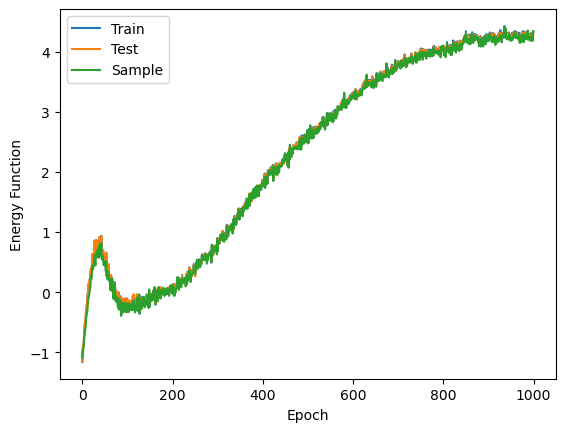

In [7]:
plot_energies(energies)

### Analysis

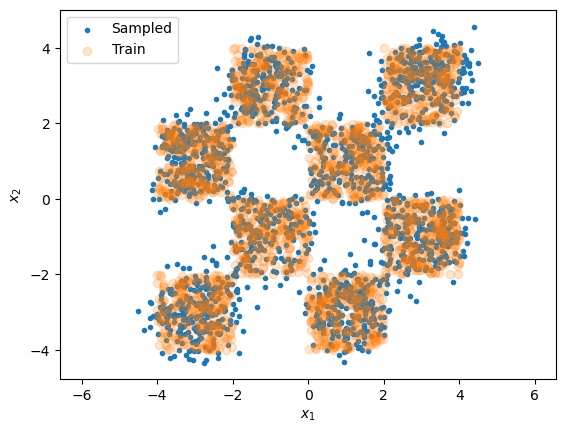

In [8]:
# Sample model
samples = sample_model(model, params, next(prng_seq), 2000)
save_samples('ebm', dataset_name, samples)
plot_data(X_train, samples)

In [7]:
# Compute estimated mean log likelihood for quantitative comparison
log_likelihood = compute_mean_log_likelihood(samples, X_test)
print('Mean log likelihood:', log_likelihood)

Mean log likelihood: -4.051894275864416


## Gaussian Mixture Dataset

### Training

In [10]:
# Create customized config
config = copy.deepcopy(config_shared)

In [11]:
dataset_name = 'gaussian_mixture'
X_train, X_test = load_dataset(dataset_name)
model = create_model(config)
params, energies = train_model(model, config, X_train, X_test)
save_losses('ebm', dataset_name, samples)

Epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 100%|██████████| 1000/1000 [09:12<00:00,  1.81it/s]


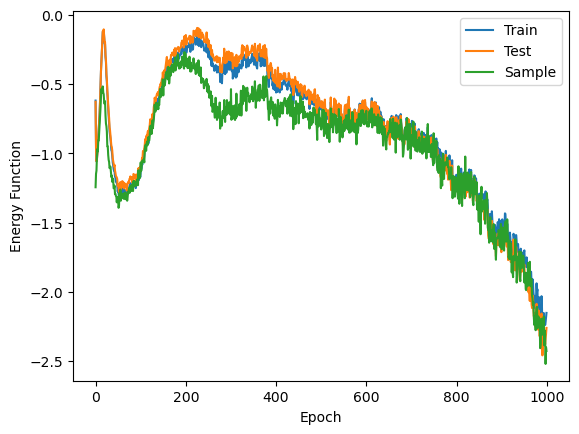

In [12]:
plot_energies(energies)

### Analysis

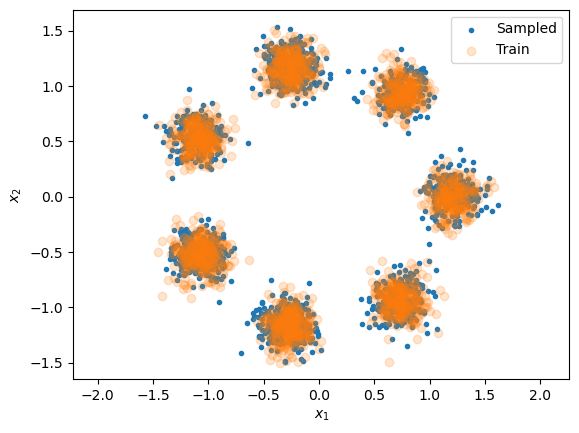

In [13]:
# Sample model
samples = sample_model(model, params, next(prng_seq), 2000)
save_samples('ebm', dataset_name, samples)
plot_data(X_train, samples)

In [14]:
# Compute estimated mean log likelihood for quantitative comparison
log_likelihood = compute_mean_log_likelihood(samples, X_test)
print('Mean log likelihood:', log_likelihood)

Mean log likelihood: -1.3521929144722797


## Pinwheel Dataset

### Training

In [15]:
# Create customized config
config = copy.deepcopy(config_shared)
config['epochs'] = 200

In [16]:
# Load dataset and train model
dataset_name = 'pinwheel'
X_train, X_test = load_dataset(dataset_name)
model = create_model(config)
params, energies = train_model(model, config, X_train, X_test)
save_losses('ebm', dataset_name, energies)

Epoch: 100%|██████████| 200/200 [01:52<00:00,  1.79it/s]


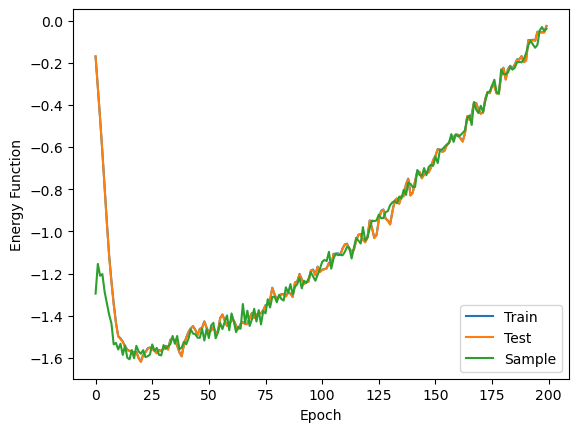

In [17]:
plot_energies(energies)

### Analysis

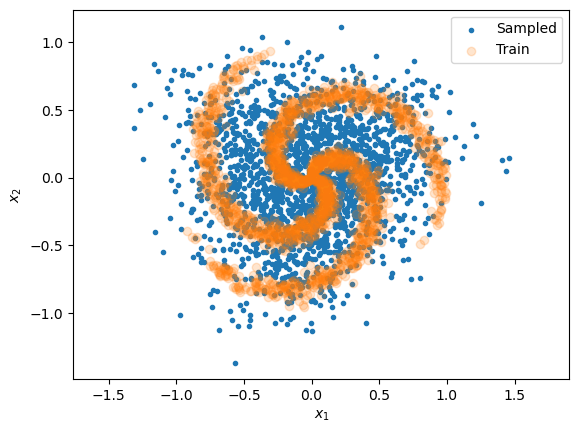

In [18]:
# Sample model
samples = sample_model(model, params, next(prng_seq), 2000)
save_samples('ebm', dataset_name, samples)
plot_data(X_train, samples)

In [19]:
# Compute estimated mean log likelihood for quantitative comparison
log_likelihood = compute_mean_log_likelihood(samples, X_test)
print('Mean log likelihood:', log_likelihood)

Mean log likelihood: -1.0283964997645625


## Spiral Dataset

### Training

In [21]:
# Create customized config
config = copy.deepcopy(config_shared)
config['epochs'] = 200

In [22]:
# Load dataset and train model
dataset_name = 'spiral'
X_train, X_test = load_dataset(dataset_name)
model = create_model(config)
params, energies = train_model(model, config, X_train, X_test)
save_losses('ebm', dataset_name, energies)

Epoch:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch: 100%|██████████| 200/200 [01:53<00:00,  1.76it/s]


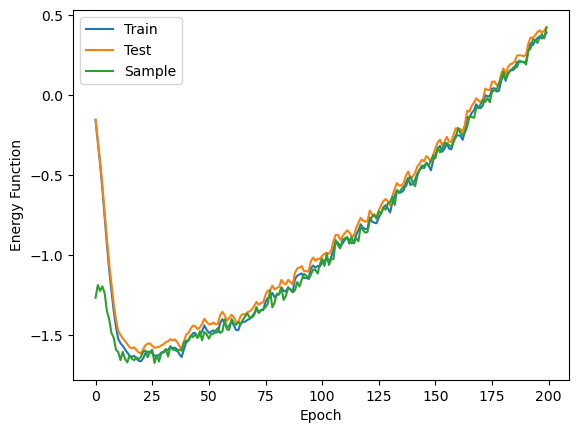

In [23]:
plot_energies(energies)

### Analysis

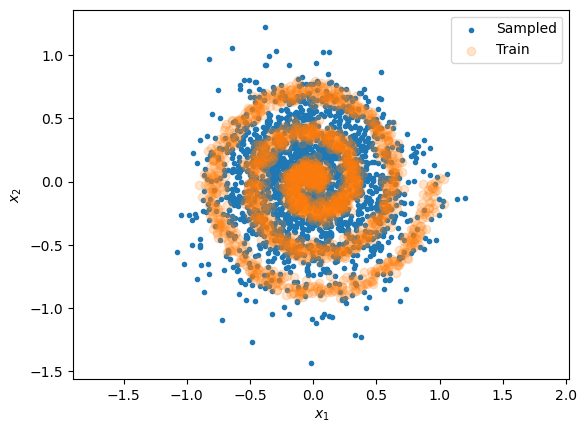

In [24]:
# Sample model
samples = sample_model(model, params, next(prng_seq), 2000)
save_samples('ebm', dataset_name, samples)
plot_data(X_train, samples)

In [25]:
# Compute estimated mean log likelihood for quantitative comparison
log_likelihood = compute_mean_log_likelihood(samples, X_test)
print('Mean log likelihood:', log_likelihood)

Mean log likelihood: -0.9018779294774706
